# Graph Analysis of CSD
### This notebook tests graph theoretic analysis on skeletons produced from persistence analysis on CSD profiles using the topology toolkit

#### Load the data

In [7]:
import numpy as np
import os
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx as nx
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout
sns.set()

if  not 'C:\\Program Files (x86)\\Graphviz2.38\\bin' in os.environ["PATH"]: 
    os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin' 

In [8]:
# csd_skeleton = np.genfromtxt('D:/Jones Lab/csd_real_skeleton.csv', delimiter = ',', skip_header=1)
csd_surface_df = pd.read_csv('D:/Jones Lab/csd_surface_points.csv', sep=',')
csd_nodes_df = pd.read_csv('D:/Jones Lab/csd_real_nodes.csv', sep=',')
csd_connectivity_df = pd.read_csv('D:/Jones Lab/csd_real_connectivity.csv', sep=',')
csd_connectivity_dense_df = pd.read_csv('D:/Jones Lab/csd_real_connectivity_dense.csv', sep=',')


surface_points = np.array(csd_surface_df[['Points:0','Points:1','Points:2']])
node_points = np.array(csd_nodes_df[['Points:0','Points:1','Points:2']])
node_connectivity = np.array(csd_connectivity_df[['upNodeId','downNodeId']])
node_connectivity_dense = np.array(csd_connectivity_dense_df[['upNodeId','downNodeId']])


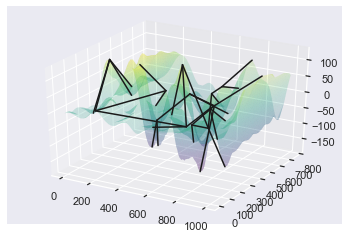

In [9]:
%matplotlib inline

num_pairs = node_connectivity.shape[0]
fig = plt.figure()
ax = plt.axes(projection='3d')

for pair in range(num_pairs):
    pairID = node_connectivity[pair]
    pairID
    xdata, ydata, zdata = node_points[pairID, 0], node_points[pairID, 1], node_points[pairID, 2]

    ax.plot(xdata,ydata,zdata, 'k')

ax.plot_trisurf(surface_points[:,0],surface_points[:,1],surface_points[:,2],cmap='viridis',edgecolor='none', alpha=0.2)

plt.show()


### Load Nodes into graph

In [19]:
G = nx.Graph()
G.add_edges_from(node_connectivity)

A = nx.Graph()
A.add_edges_from(node_connectivity_dense)
pos = graphviz_layout(A, prog='neato')

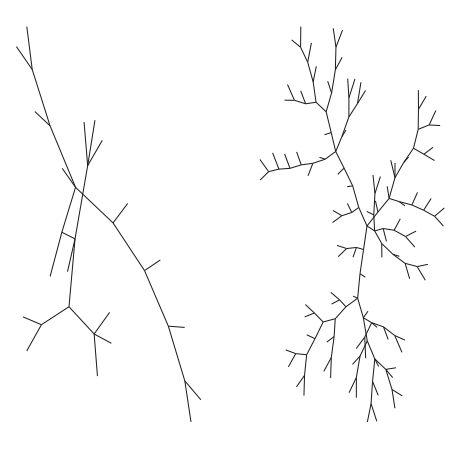

In [21]:
plt.figure(figsize=(8,8))
plt.subplot(121)
nx.draw(G, font_weight='bold', node_size=0)

plt.subplot(122)
nx.draw(A,pos,node_size=0)
